In [104]:
import numpy as np
import pandas as pd
import glob
import os
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

In [83]:
path = "data"
file_contents = []
file_paths = glob.glob(path + '/*.txt')
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        file_contents.append(content)

In [28]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

ner_results = []
for file in file_contents:
    ner_results.append(nlp(file))

In [29]:
for ner in ner_results:
    print(ner)

[{'entity_group': 'ORG', 'score': 0.99863845, 'word': 'Senate', 'start': 25, 'end': 31}, {'entity_group': 'ORG', 'score': 0.9976657, 'word': 'House of Representatives', 'start': 36, 'end': 60}, {'entity_group': 'LOC', 'score': 0.99948084, 'word': 'North Carolina', 'start': 266, 'end': 280}, {'entity_group': 'MISC', 'score': 0.5560741, 'word': 'Constitution', 'start': 288, 'end': 300}, {'entity_group': 'LOC', 'score': 0.99740946, 'word': 'United States', 'start': 308, 'end': 321}, {'entity_group': 'ORG', 'score': 0.5353193, 'word': 'Union', 'start': 492, 'end': 497}, {'entity_group': 'ORG', 'score': 0.7872983, 'word': 'Providence', 'start': 985, 'end': 995}, {'entity_group': 'MISC', 'score': 0.66573346, 'word': 'Indians', 'start': 2065, 'end': 2072}, {'entity_group': 'ORG', 'score': 0.97660893, 'word': 'Commonwealth', 'start': 2322, 'end': 2334}, {'entity_group': 'LOC', 'score': 0.99796, 'word': 'Virginia', 'start': 2338, 'end': 2346}, {'entity_group': 'ORG', 'score': 0.47956178, 'word'

In [30]:
entity_count = []

for ner in ner_results:
    word_count = {}
    for entry in ner:
        word = entry['word']
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    entity_count.append(word_count)
entity_count

[{'Senate': 1,
  'House of Representatives': 1,
  'North Carolina': 1,
  'Constitution': 1,
  'United States': 2,
  'Union': 2,
  'Providence': 1,
  'Indians': 1,
  'Commonwealth': 1,
  'Virginia': 1},
 {'Senate': 1,
  'House of Representatives': 1,
  'American': 1,
  'Holland': 1,
  'Europe': 1,
  'Treasury': 1,
  'Kentucky': 2,
  'Virginia': 1,
  'Union': 2,
  'Congress': 2,
  'AP': 1},
 {'Senate': 1,
  'House of Representatives': 1,
  'Indians': 2,
  'Constitution': 1,
  'United States': 1,
  'Bank of the United States': 1},
 {'Senate': 1,
  'House of Representatives': 1,
  'Indian': 1,
  'Northwestern': 1,
  'Ohio': 1,
  'Cherokee': 1,
  'Tennessee': 1},
 {'Senate': 1,
  'House of Representatives': 1,
  'Europe': 1,
  'United States': 4,
  'France': 1,
  'Congress': 1},
 {'Senate': 1,
  'House of Representatives': 1,
  'Heaven': 1,
  'American': 1,
  'United States': 2,
  'Constitution': 1,
  'States': 1,
  'Pennsylvania': 2,
  'Congress': 1},
 {'Senate': 2,
  'House of Representat

Sorting by president

In [84]:


files = os.listdir(path)
by_president={}
for file in files:
    filename = os.path.splitext(file)[0]
    year, president = filename.split('_')
    with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
        address = f.read()
    if president in by_president:
        by_president[president].append(address)
    else:
        by_president[president] = [address]



In [85]:


president_name = 'Washington'
if president_name in by_president:
    addressesW = by_president[president_name]
    print(f"State of the Union addresses for {president_name}:")
    print(len(addressesW))
    for address in addressesW:
        print(address[0:50])



State of the Union addresses for Washington:
8


Fellow-Citizens of the Senate and House of Repre


Fellow-Citizens of the Senate and House of Repre


Fellow-Citizens of the Senate and House of Repre


Fellow-Citizens of the Senate and House of Repre


Fellow-Citizens of the Senate and House of Repre


Fellow-Citizens of the Senate and House of Repre


Fellow-Citizens of the Senate and House of Repre


Fellow-Citizens of the Senate and House of Repre


In [ ]:
president_name = 'Washington'
if president_name in by_president:
    addresses = by_president[president_name]
    print(f"State of the Union addresses for {president_name}:")
    for address in addresses:
        sentences = sent_tokenize(address)
        token_sentences = [word_tokenize(sent) for sent in sentences]

        # Tag each tokenized sentence into parts of speech: pos_sentences
        pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

        # Create the named entity chunks: chunked_sentences  
        chunked_sentences = ne_chunk_sents(pos_sentences, binary=False)
        ner_categories_combined = defaultdict(int)

        # Create the nested for loop
        for sent in chunked_sentences:
            for chunk in sent:
                if hasattr(chunk, 'label'):
                    ner_categories_combined[chunk.label()] += 1

    # Create a list from the dictionary keys for the chart labels: labels
    labels = list(ner_categories_combined.keys())

    # Create a list of the values: values
    values = [ner_categories_combined.get(l) for l in labels]

    # Create the pie chart
    fig = plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Combined Named Entity Categories for Washington's Speeches")
    plt.show()

In [32]:
president = 'Obama'
count_entities_obama = {}
if president_name in by_president:
    addresses = by_president[president_name]
    for address in addresses:
        result = nlp(address)
        for entity in result:
            word = entity['word']
            if word in count_entities_obama:
                count_entities_obama[word] += 1
            else:
                count_entities_obama[word] = 1
print(count_entities_obama)

{'Senate': 9, 'House of Representatives': 8, 'North Carolina': 1, 'Constitution': 3, 'United States': 15, 'Union': 4, 'Providence': 1, 'Indians': 7, 'Commonwealth': 1, 'Virginia': 2, 'American': 2, 'Holland': 1, 'Europe': 2, 'Treasury': 1, 'Kentucky': 2, 'Congress': 4, 'AP': 1, 'Bank of the United States': 1, 'Indian': 1, 'Northwestern': 1, 'Ohio': 2, 'Cherokee': 1, 'Tennessee': 1, 'France': 1, 'Heaven': 1, 'States': 1, 'Pennsylvania': 2, 'Creek': 4, 'Cherokee Indians': 1, 'Southern': 1, 'Georgia': 2, 'Morocco': 1, 'Algiers': 1, 'Madrid': 1, 'Nation': 1, 'Colerain': 1, 'State of': 1, 'B': 1, '##tanic': 1, 'Canada': 1, 'O': 1, 'Niagara': 1, 'Detroit': 1, 'Fort': 1, 'Miami': 1, 'Great': 1, 'Britain': 1, 'St': 1, 'Croix': 1}


In [107]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")
president = 'Washington'
addresses = by_president[president]
label_count = {}
for address in addresses:
    results = nlp(address)
    for entity in results:
        group = entity['entity_group']
        if group not in label_count:
            label_count[group] = 1
        else:
            label_count[group] += 1
print(label_count)



{'ORG': 32, 'LOC': 49, 'MISC': 21}


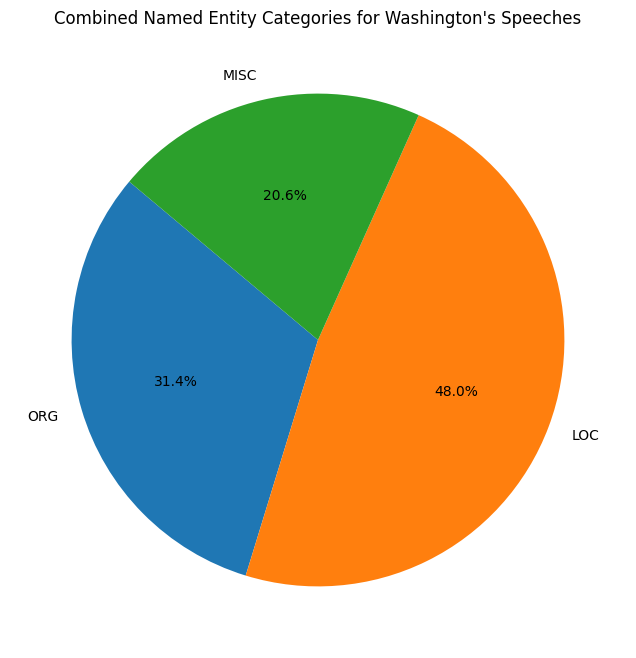

In [108]:
values = list(label_count.values())
labels = list(label_count.keys())

fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Combined Named Entity Categories for Washington's Speeches")
plt.show()

In [48]:
sorted_count_obama = sorted(count_entities_obama.items(), reverse=True, key=lambda x:x[1])
print(list(dict(sorted_count_obama).keys())[0:5])
dict(sorted_count_obama[0:10])


['United States', 'Senate', 'House of Representatives', 'Indians', 'Union']


{'United States': 15,
 'Senate': 9,
 'House of Representatives': 8,
 'Indians': 7,
 'Union': 4,
 'Congress': 4,
 'Creek': 4,
 'Constitution': 3,
 'Virginia': 2,
 'American': 2}

In [49]:
count_by_president = {}
for president_name in by_president.keys():
    addresses = by_president[president_name]
    count_entities = {}
    for address in addresses:
        result = nlp(address)
        for entity in result:
            word = entity['word']
            if word in count_entities:
                count_entities[word] += 1
            else:
                count_entities[word] = 1
    count_entities = sorted(count_entities.items(), reverse=True, key=lambda x:x[1])
    count_by_president[president_name] = count_entities
print(count_by_president)

{'Washington': [('United States', 15), ('Senate', 9), ('House of Representatives', 8), ('Indians', 7), ('Union', 4), ('Congress', 4), ('Creek', 4), ('Constitution', 3), ('Virginia', 2), ('American', 2), ('Europe', 2), ('Kentucky', 2), ('Ohio', 2), ('Pennsylvania', 2), ('Georgia', 2), ('North Carolina', 1), ('Providence', 1), ('Commonwealth', 1), ('Holland', 1), ('Treasury', 1), ('AP', 1), ('Bank of the United States', 1), ('Indian', 1), ('Northwestern', 1), ('Cherokee', 1), ('Tennessee', 1), ('France', 1), ('Heaven', 1), ('States', 1), ('Cherokee Indians', 1), ('Southern', 1), ('Morocco', 1), ('Algiers', 1), ('Madrid', 1), ('Nation', 1), ('Colerain', 1), ('State of', 1), ('B', 1), ('##tanic', 1), ('Canada', 1), ('O', 1), ('Niagara', 1), ('Detroit', 1), ('Fort', 1), ('Miami', 1), ('Great', 1), ('Britain', 1), ('St', 1), ('Croix', 1)], 'Adams': [('Congress', 6), ('United States', 6), ('Senate', 4), ('House of Representatives', 4), ('Philadelphia', 2), ('Constitution', 2), ('Holland', 2),

In [52]:
for president in count_by_president:
    print(president)
    print(count_by_president[president][0:10])

Washington
[('United States', 15), ('Senate', 9), ('House of Representatives', 8), ('Indians', 7), ('Union', 4), ('Congress', 4), ('Creek', 4), ('Constitution', 3), ('Virginia', 2), ('American', 2)]
Adams
[('Congress', 6), ('United States', 6), ('Senate', 4), ('House of Representatives', 4), ('Philadelphia', 2), ('Constitution', 2), ('Holland', 2), ('National Legislature', 1), ('Europe', 1), ('French Republic', 1)]
Wilson
[('Congress', 11), ('Union', 4), ('United States', 2), ('Senate', 2), ('America', 2), ('Europe', 2), ('Commission', 2), ('American', 2), ('Government', 1), ('Six', 1)]
Harding
[('Congress', 3), ('Republic', 1), ('World War', 1)]
Coolidge
[('American', 3), ('Congress', 1), ('Nation', 1), ('Harding', 1), ('League of Nations', 1), ('Senate', 1), ('League', 1), ('United', 1), ('States', 1)]
Roosevelt
[('Congress', 18), ('American', 13), ('United States', 11), ('Pacific', 7), ('Senate', 5), ('House of Representatives', 4), ('Union', 4), ('Seven', 4), ('Americans', 4), ('Ja

In [14]:
from fastcoref import FCoref
coref_model = FCoref(device='cpu')

preds = coref_model.predict(texts = file_contents)

05/31/2023 12:19:55 - INFO - 	 missing_keys: []
05/31/2023 12:19:55 - INFO - 	 unexpected_keys: []
05/31/2023 12:19:55 - INFO - 	 mismatched_keys: []
05/31/2023 12:19:55 - INFO - 	 error_msgs: []
05/31/2023 12:19:55 - INFO - 	 Model Parameters: 90.5M, Transformer: 82.1M, Coref head: 8.4M
05/31/2023 12:19:56 - INFO - 	 Tokenize 99 inputs...
05/31/2023 12:20:31 - INFO - 	 ***** Running Inference on 99 texts *****
Inference: 100%|██████████| 99/99 [10:19<00:00,  6.26s/it]


In [64]:
print(preds[0].get_clusters(as_strings=True))
preds[0].get_clusters(as_strings=False)

[['the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs', 'itself'], ['Fellow-Citizens of the Senate and House of Representatives', 'you', 'your', 'you', 'your', 'you', 'your', 'your', 'you', 'you', 'you', 'you', 'your', 'Gentlemen of the House of Representatives', 'you', 'your', 'your', 'your', 'Gentlemen of the Senate and House of Representatives', 'you', 'your', 'you', 'you'], ['the United States', 'our country', 'the Union', 'the Union', 'the United States', 'our', 'the United States', 'our country', 'the United States', 'the Union', 'our country'], ['our', 'we', 'our', 'our'], ['your constituents', 'their'], ['A free people', 'their', 'they'], ['such manufactories', 'them'], ['The proper establishment of the troops which may be deemed indispensable', 'it'], ['the inhabitants of our southern and western frontiers', 'their'], ['I', 'I', 'me', 'my', 'I', 'I', 'I', 'I', 'me', 'I', 'I', 'I', 'I', 'my', 'I'], ['the pers

[[(97, 217), (132, 138)],
 [(2, 60),
  (157, 160),
  (651, 655),
  (691, 694),
  (815, 819),
  (883, 886),
  (1121, 1125),
  (1214, 1218),
  (2176, 2179),
  (2278, 2281),
  (3490, 3493),
  (3840, 3843),
  (3921, 3925),
  (5270, 5311),
  (5407, 5410),
  (5425, 5429),
  (5639, 5643),
  (6016, 6020),
  (6035, 6087),
  (6140, 6143),
  (6235, 6239),
  (6282, 6285),
  (6523, 6526)],
 [(304, 321),
  (413, 424),
  (488, 497),
  (2416, 2425),
  (2486, 2503),
  (2517, 2520),
  (3235, 3252),
  (3744, 3755),
  (5909, 5926),
  (6319, 6328),
  (6376, 6387)],
 [(199, 202), (545, 547), (613, 616), (2112, 2115)],
 [(815, 832), (921, 926)],
 [(1380, 1393), (1503, 1508), (1542, 1546)],
 [(1562, 1580), (1599, 1603)],
 [(1675, 1747), (1839, 1841)],
 [(2093, 2146), (2152, 2157)],
 [(63, 64),
  (2245, 2246),
  (2608, 2610),
  (2622, 2624),
  (3297, 3298),
  (3424, 3425),
  (3458, 3459),
  (3818, 3819),
  (3860, 3862),
  (5314, 5315),
  (5589, 5590),
  (5716, 5717),
  (6090, 6091),
  (6341, 6343),
  (6465, 64

In [77]:

file_contents_coref = []
for i,doc in enumerate(preds):
    file_text = file_contents[i]
    groups_words = doc.get_clusters()
    for k, group in enumerate(doc.get_clusters(as_strings=False)):
        group_words = groups_words[k]
        for j in range(1, len(group)):
            index_0 = group[j][0]
            index_1 = group[j][1]
            middle = group_words[j]
            file_text = file_contents[i][0:index_0] + ' ' + str(group_words[0]) + file_contents[i][index_1:len(file_text)-1]
    file_contents_coref.append(file_text)

In [78]:
file_contents_coref[0]

'\n\nFellow-Citizens of the Senate and House of Representatives:\n\nI embrace with great satisfaction the opportunity which now presents  the opportunity which no Fellow-Citizens of the Senate and House of Representativesresents itself of congratulating you on the present favorable prospects of our public affairs of congratulating you on the present favorable prospects of our public affairs. The recent accession of the United Statesant state of North Carolina to the Constitution of the Un the United Stateses (of which official information has b ourn received), the rising credit and respectability of our country ourhe general and increasing good will toward the govern Fellow-Citizens of the Senate and House Fellow-Citizens of the Senate and House of Representatives Representatives of the Union, and the concord, peace, and plenty Fellow-Citizens of the Senate and House of Representativesh which w Fellow-Citizens of your constituentsSenate and House of Representativesre blessed are circum

In [47]:
txt = file_contents[0]
clusters = preds[0].get_clusters(as_strings=False)
clusters_words = preds[0].get_clusters()
for cluster in clusters:
    print(clusters_words[0])
    print(cluster[1][0])
    print(txt[0:132])

    for j in range(1, len(cluster)):
       
        index_0 = cluster[j][0]
        begining = txt[0:index_0]
        #if i == 0: print(begining)

['the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs', 'itself']
132


Fellow-Citizens of the Senate and House of Representatives:

I embrace with great satisfaction the opportunity which now presents 
['the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs', 'itself']
157


Fellow-Citizens of the Senate and House of Representatives:

I embrace with great satisfaction the opportunity which now presents 
['the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs', 'itself']
413


Fellow-Citizens of the Senate and House of Representatives:

I embrace with great satisfaction the opportunity which now presents 
['the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs', 'itself']
545


Fellow-Citizens of the Senate and House of 

# Sentiment analysis

In [79]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

print(sentiment_analysis("I love captain H"))

[{'label': 'POSITIVE', 'score': 0.9988370537757874}]


In [91]:
print(sentiment_analysis(["I hate captain H", "I love captain H"]))

[{'label': 'NEGATIVE', 'score': 0.9992293119430542}, {'label': 'POSITIVE', 'score': 0.9988370537757874}]


In [93]:
from nltk import sent_tokenize

aggregate_sentiment = {}
for president_name in by_president:
    sentiment_by_speech = []
    for speech in by_president[president_name]:
        sentences = sent_tokenize(speech)
        num_sent = len(sentences)
        sentiment = 0
        sent_res = sentiment_analysis(sentences)
        for res in sent_res:
            if res['label'] == 'POSITIVE':
                sentiment += res['score']
            else:
                sentiment -= res['score']
        # for sent in sentences:
        #     sentiment_result = sentiment_analysis(sent)
        #     print(sentiment_result)
        #     sentiment += sentiment_result[0]
        sentiment = sentiment / num_sent
        print(sentiment)
    sentiment_by_speech.append(sentiment)
    aggregate_sentiment[president_name] = sentiment_by_speech
print(aggregate_sentiment)


0.9144988159338633
0.7364183099646318
0.7913740760293501
0.38653863486597095
0.4478337025200879
0.20575880545836228
0.6757063772164139
0.39475583559588384
0.41205467335109053
0.4375357660982344
0.6542969243867057
0.7848312288522721
0.5720733823599639
0.315447130175524
0.4027893807855957
0.46840496782986624
0.16849674522012903
0.4668743176224791
0.3978713545502658
0.13450103499290703
0.35407994764702194
0.5579075851997772
0.634281812811927
0.1694701251230742
0.46447064479192096
0.15675287474097543
0.31433194563832395
0.4050401582205591
0.43415443156216593
0.29233671211253454
0.3917301282286644
0.4437809994775955
0.7207947107997253
0.540791865600192
0.826283723243828
0.5728169022273625
0.4870184240894513
0.5368452900460251
0.6704906118543524
0.8146744008575167
0.7549014700152886
0.6513812053860641
0.5743041984511145
0.5647742593989653
0.2641704226461586
0.5820791725726688
0.44613907946480647
0.6614589669566223
0.7714889876602232
0.5629706641413131
0.5691774672185871
0.5920720345417972
0.

In [111]:
print(aggregate_sentiment['Harding'])

[0.13450103499290703]


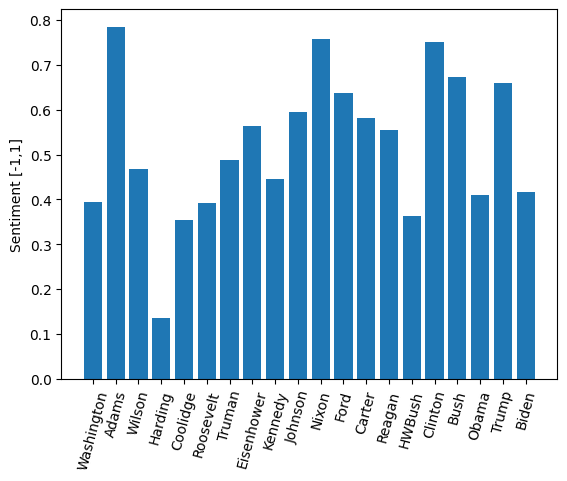

In [102]:
import matplotlib.pyplot as plt
sent_values = [x[0] for x in aggregate_sentiment.values()]
plt.bar(aggregate_sentiment.keys(),sent_values)
plt.xticks(rotation=75)
plt.ylabel('Sentiment [-1,1]')
plt.show()

In [109]:
test_NER_adams_1797 = {'Senate': 'ORG', 'House of Representatives':'ORG', 'Congress': 'ORG', 'United States of America':'LOC',
                       'Union':'LOC', 'American':'MISC', 'Pennsylvania':'LOC', 'United States':'LOC', 'French Republic':'LOC', 'French Government':'ORG',
                       'Paris':'LOC', 'island of St. Domingo':'LOC', 'Philadelphia': 'LOC', 'Great Britain':'LOC', 'Britannic Majesty':'PER',
                       'London':'LOC', 'city of Washington':'LOC', 'France':'LOC'}

result_NEW_adams_1797 = {'Senate':'ORG', 'House of Representatives':'ORG', 'Congress of': 'ORG', 'United States of America':'LOC', 'Union': 'LOC',
                         'American':'MISC', 'Pennsylvania':'LOC'}

def evaluate_ner(ner_result, labeled):
    correct = 0
    incorrect = 0
    spur = 0
    miss = 0
    actual = len(ner_result)
    for entity in labeled:
        if entity in ner_result and labeled[entity] == ner_result[entity]:
            correct += 1
        elif entity in ner_result and labeled[entity] != ner_result[entity]:
            incorrect += 1
        if entity not in ner_result:
            miss += 1
    for entity in ner_result:
        if entity not in labeled:
            spur += 1
    possible = correct + incorrect + miss
    actual = correct + incorrect + spur
    precision = correct/actual
    recall = correct/possible
    f1 = (2 * (precision*recall))/(precision + recall)
    return precision, recall, f1

In [110]:
evaluate_ner(result_NEW_adams_1797, test_NER_adams_1797)

(0.8571428571428571, 0.3333333333333333, 0.48)